In [5]:
# importing the required module 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy

In [6]:
#Notice in the following commend I also set the first column 0 to be the index column. This will be helpful when trying to make heat maps later... Be sure to specify the actual location of the file - place "r" before the path string to address special character, such as '/'.

df = pd.read_excel (r'/Users/jonathanokerblom/Dropbox/My Mac (Jonathan’s MacBook Air)/Documents/Bio133/ethnicitysuccess.xlsx', index_col=0) 
df.describe()

,American Indian,Asian,African/AA,Filipinx,Latinx,Multiple Ethnicicties,Pacific Islander
count,10.000000,17.000000,16.000000,14.000000,17.000000,15.000000,10.000000
mean,77.000000,81.647059,66.750000,72.357143,69.941176,75.533333,60.600000
std,23.772066,10.993982,19.136353,15.138373,13.178916,14.739968,16.932546
min,33.000000,53.000000,29.000000,32.000000,48.000000,41.000000,33.000000
25%,65.500000,77.000000,59.000000,66.500000,59.000000,66.500000,50.000000
50%,77.500000,82.000000,67.000000,77.000000,72.000000,79.000000,58.000000
75%,100.000000,88.000000,79.000000,80.000000,76.000000,83.000000,71.500000
max,100.000000,100.000000,100.000000,93.000000,97.000000,100.000000,88.000000


In [7]:
#It's easy to view this data in table form. Just type:

df

,American Indian,Asian,African/AA,Filipinx,Latinx,Multiple Ethnicicties,Pacific Islander
Class Success,,,,,,,
Bio 100,NaN,53,40.0,32.0,48,41.0,33.0
Bio 107,72.0,82,65.0,80.0,72,73.0,61.0
Bio 115,NaN,79,29.0,NaN,71,81.0,NaN
Bio 130,100.0,88,69.0,78.0,72,90.0,NaN
Bio 131,67.0,88,67.0,74.0,65,83.0,50.0
Bio 132,NaN,78,78.0,80.0,67,83.0,NaN
Bio 133,NaN,76,63.0,83.0,78,67.0,50.0
Bio 134,NaN,100,88.0,NaN,97,67.0,NaN
Bio 135,100.0,82,NaN,NaN,76,NaN,NaN


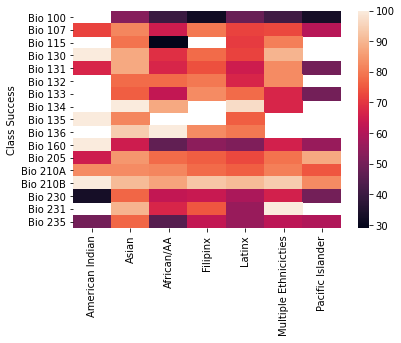

In [8]:
#Now let's make a heatmap of the original data using seaborn:

sns.heatmap(df)
plt.show()

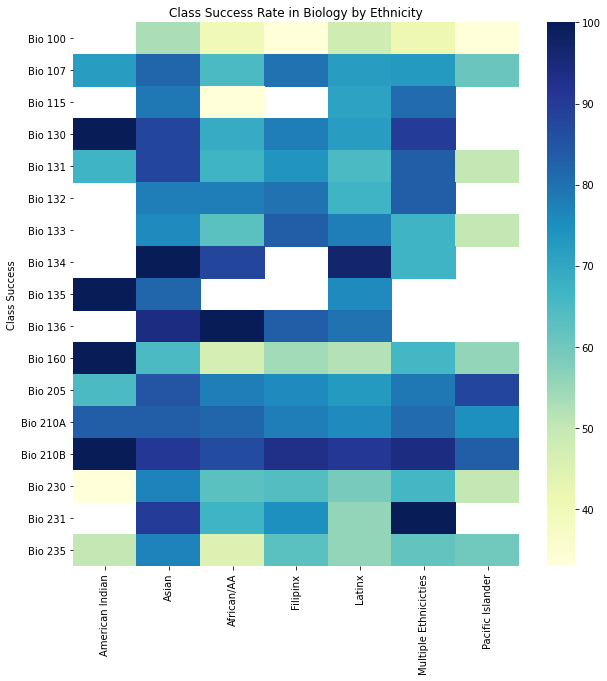

In [9]:
#We can specify the figure size using matplotlib.pyplot (plt)
fig1 = plt.subplots(figsize=(10, 10)) 

#We can set the title using matplotlib.pyplot (plt)
fig1 = plt.axes()
fig1.set_title('Class Success Rate in Biology by Ethnicity')

sns.heatmap(df, cmap = 'YlGnBu', robust = True)
plt.show()

We can also create a correlation plot of the data by defining the following function:

In [10]:
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

Now that that function has been defined, we can implement by simply entering the following:

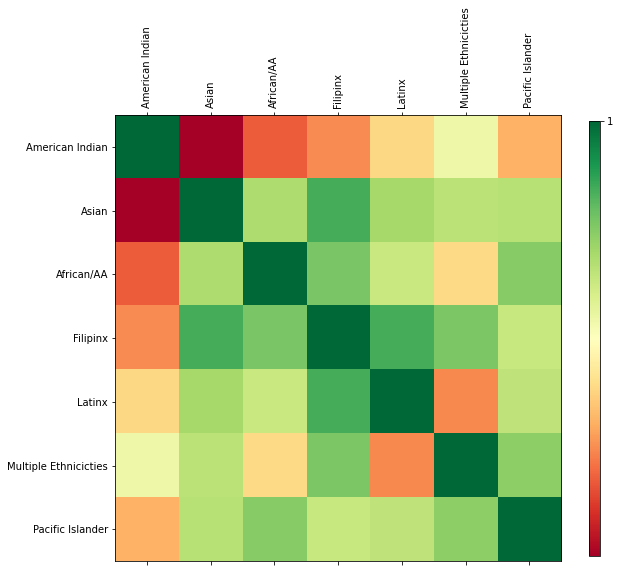

In [11]:
plot_corr(df)

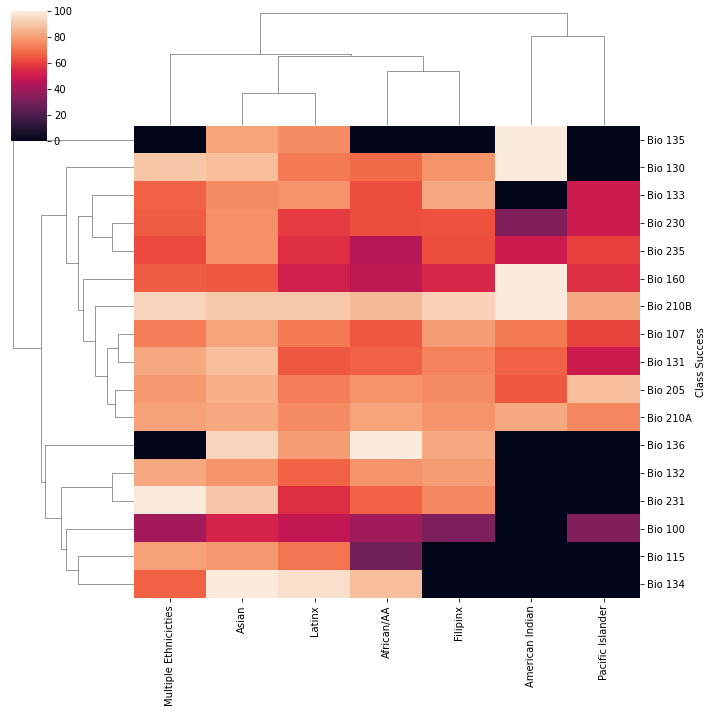

In [14]:
#To perform a clustermap, we cannot have missing values, so for experimental purposes, we can try replacing empty values with the value 0
df0 = df.fillna(0)

#To create a clustermap using seaborn, we can use the following code:
sns.clustermap(df0)

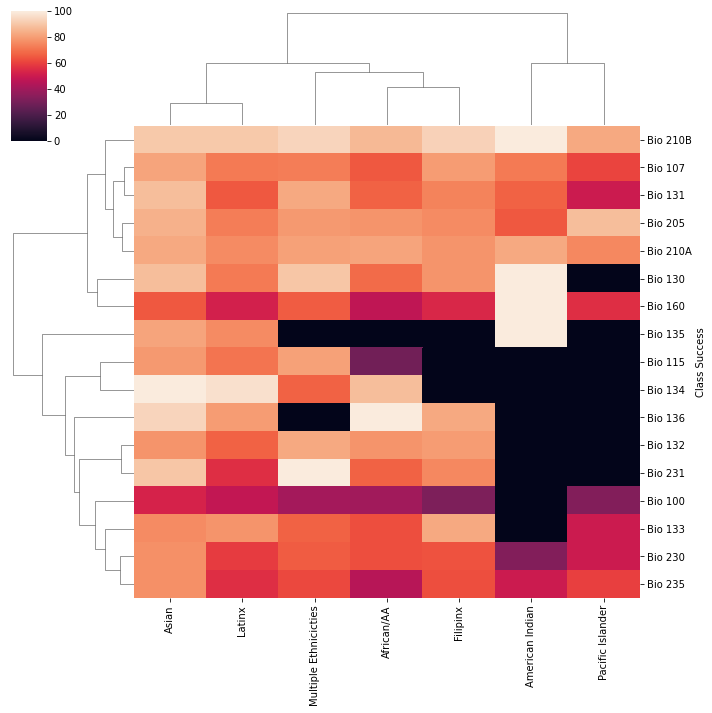

In [15]:
#We can change the figure differences more robust, change the size to 10x10, and the clustering method to ward
sns.clustermap(df0, robust = True, method = 'ward', figsize=(10, 10))

You may notice that ethnicity and class are mainly clustering by their missing values in black. To fix this, we can impute values (make up numbers, which we won't do here), or remove missing values...

In [16]:
#To remove missing values from dataset
dfd = df.dropna()
dfd

,American Indian,Asian,African/AA,Filipinx,Latinx,Multiple Ethnicicties,Pacific Islander
Class Success,,,,,,,
Bio 107,72.0,82,65.0,80.0,72,73.0,61.0
Bio 131,67.0,88,67.0,74.0,65,83.0,50.0
Bio 160,100.0,65,47.0,54.0,52,66.0,56.0
Bio 205,65.0,85,78.0,76.0,73,79.0,88.0
Bio 210A,83.0,83,82.0,78.0,76,81.0,75.0
Bio 210B,100.0,91,87.0,93.0,91,94.0,83.0
Bio 230,33.0,77,63.0,64.0,59,66.0,50.0
Bio 235,50.0,77,45.0,63.0,56,62.0,60.0


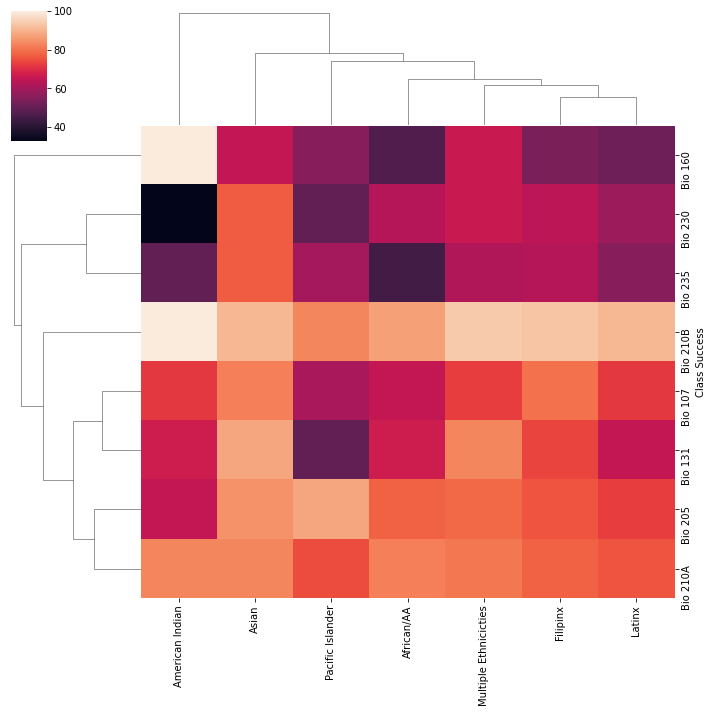

In [17]:
#Generate clustermap with default settings
sns.clustermap(dfd)

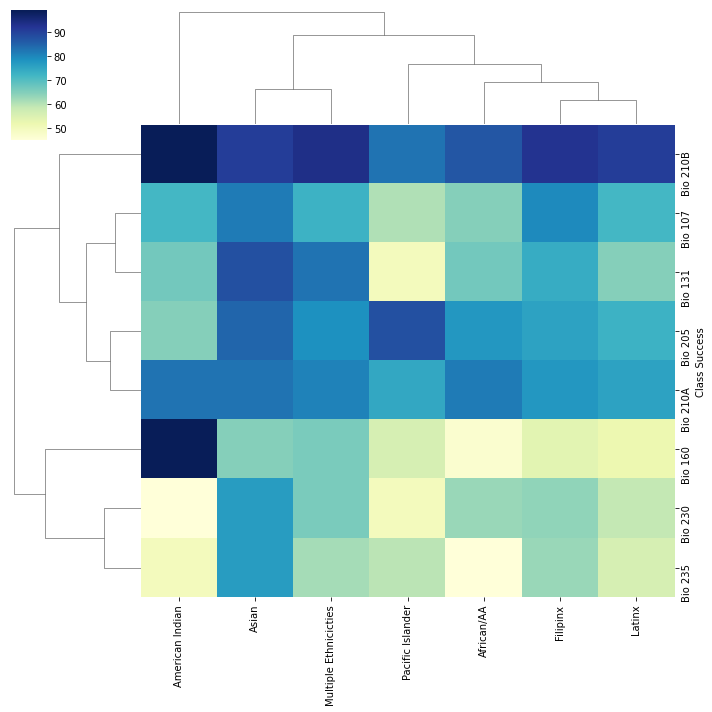

In [18]:
#Generate clustermap of data using complete method
sns.clustermap(dfd, robust = True,  cmap = "YlGnBu", method = 'complete', figsize=(10, 10))

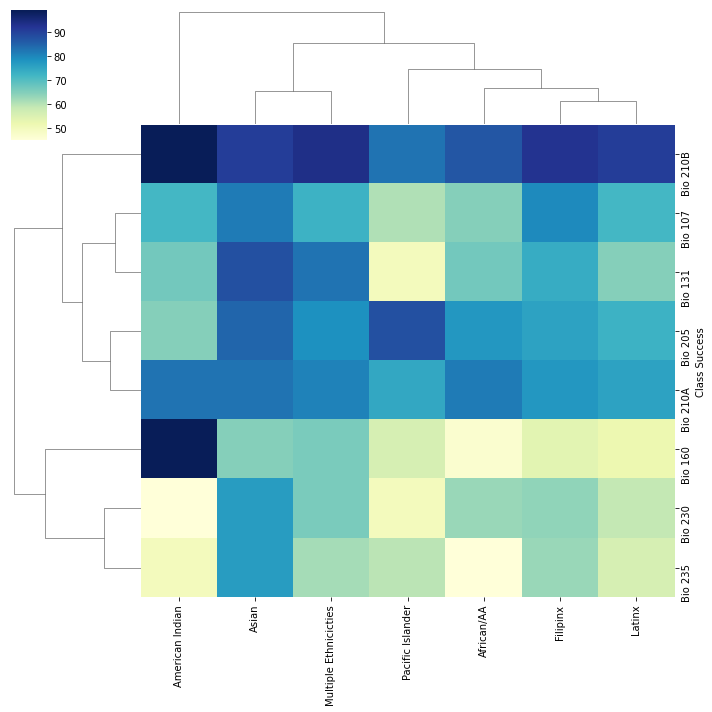

In [19]:
#Generate clustermap of data using weighted method
sns.clustermap(dfd, robust = True, cmap = "YlGnBu", method = 'ward', figsize=(10, 10))

In [20]:
#Notice in the following commend I also set the first column 0 to be the index column. This will be helpful when trying to make heat maps later... Be sure to specify the actual location of the file - place "r" before the path string to address special character, such as '\'.

dfg = pd.read_excel (r'/Users/jonathanokerblom/Dropbox/My Mac (Jonathan’s MacBook Air)/Documents/Bio133/gendersuccess.xlsx', index_col=0) 
dfg.describe()

,Male,Female
count,17.000000,17.000000
mean,74.235294,80.588235
std,12.507645,11.974237
min,46.000000,51.000000
25%,67.000000,77.000000
50%,76.000000,81.000000
75%,82.000000,91.000000
max,95.000000,97.000000


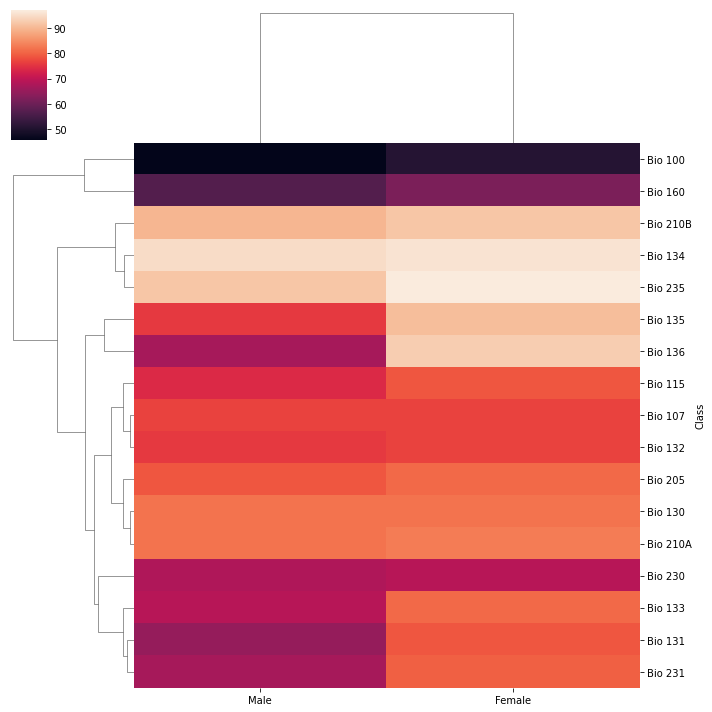

In [21]:
#Generate clustermap with default settings
sns.clustermap(dfg)

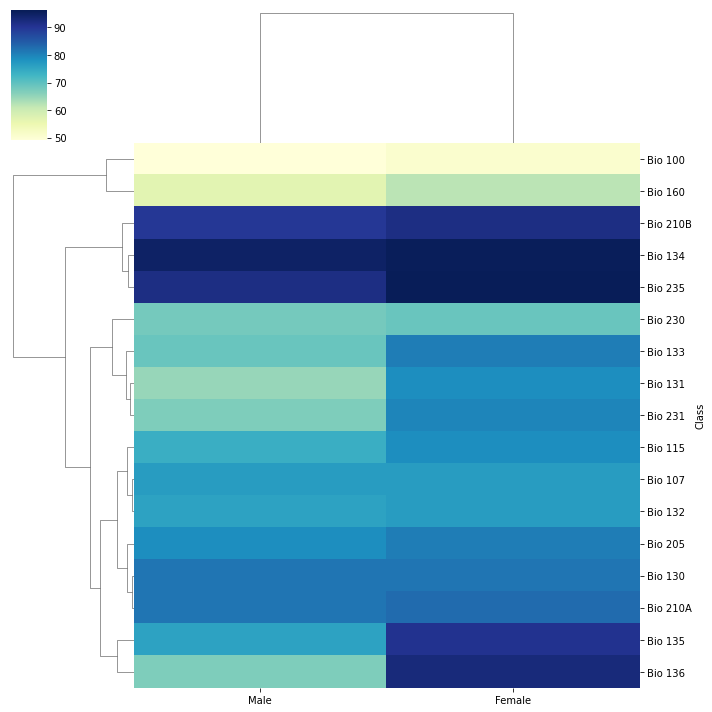

In [22]:
#Generate clustermap of data using complete method
sns.clustermap(dfg, robust = True,  cmap = "YlGnBu", method = 'complete', figsize=(10, 10))

In [23]:
#Notice in the following commend I also set the first column 0 to be the index column. This will be helpful when trying to make heat maps later... Be sure to specify the actual location of the file - place "r" before the path string to address special character, such as '\'.

dfeg = pd.read_excel (r'/Users/jonathanokerblom/Dropbox/My Mac (Jonathan’s MacBook Air)/Documents/Bio133/ethgendersuccess.xlsx', index_col=0) 
dfeg.describe()

,Male,Female,American Indian,Asian,African/AA,Filipinx,Latinx,Multiple Ethnicicties,Pacific Islander,Veteran,Non Veteran
count,17.000000,17.000000,10.000000,17.000000,16.000000,14.000000,17.000000,15.000000,10.000000,17.000000,17.000000
mean,74.235294,80.588235,77.000000,81.647059,66.750000,72.357143,69.941176,75.533333,60.600000,78.764706,78.058824
std,12.507645,11.974237,23.772066,10.993982,19.136353,15.138373,13.178916,14.739968,16.932546,15.734236,12.244747
min,46.000000,51.000000,33.000000,53.000000,29.000000,32.000000,48.000000,41.000000,33.000000,50.000000,47.000000
25%,67.000000,77.000000,65.500000,77.000000,59.000000,66.500000,59.000000,66.500000,50.000000,67.000000,75.000000
50%,76.000000,81.000000,77.500000,82.000000,67.000000,77.000000,72.000000,79.000000,58.000000,77.000000,77.000000
75%,82.000000,91.000000,100.000000,88.000000,79.000000,80.000000,76.000000,83.000000,71.500000,90.000000,83.000000
max,95.000000,97.000000,100.000000,100.000000,100.000000,93.000000,97.000000,100.000000,88.000000,100.000000,96.000000


In [24]:
dfeg0 = dfeg.fillna(0)

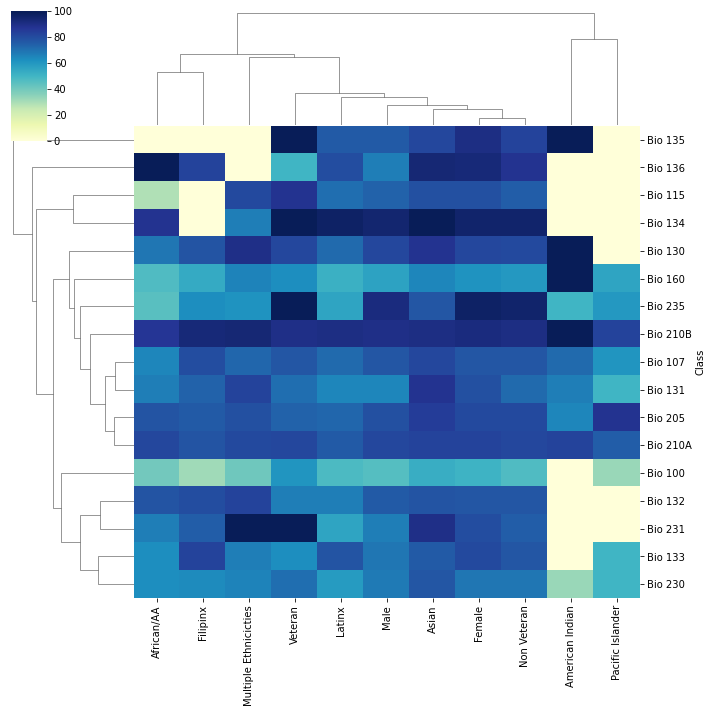

In [25]:
#Generate clustermap of data using complete method
sns.clustermap(dfeg0, robust = True,  cmap = "YlGnBu", method = 'average', figsize=(10, 10))

In [26]:
#To remove missing values from dataset
dfegd = dfeg.dropna()
dfegd

,Male,Female,American Indian,Asian,African/AA,Filipinx,Latinx,Multiple Ethnicicties,Pacific Islander,Veteran,Non Veteran
Class,,,,,,,,,,,
Bio 107,77,77,72.0,82,65.0,80.0,72,73.0,61.0,77,77
Bio 131,65,79,67.0,88,67.0,74.0,65,83.0,50.0,71,72
Bio 160,57,62,100.0,65,47.0,54.0,52,66.0,56.0,63,60
Bio 205,79,81,65.0,85,78.0,76.0,73,79.0,88.0,74,81
Bio 210A,82,83,83.0,83,82.0,78.0,76,81.0,75.0,82,82
Bio 210B,90,92,100.0,91,87.0,93.0,91,94.0,83.0,90,91
Bio 230,68,69,33.0,77,63.0,64.0,59,66.0,50.0,71,69
Bio 235,92,97,50.0,77,45.0,63.0,56,62.0,60.0,100,96


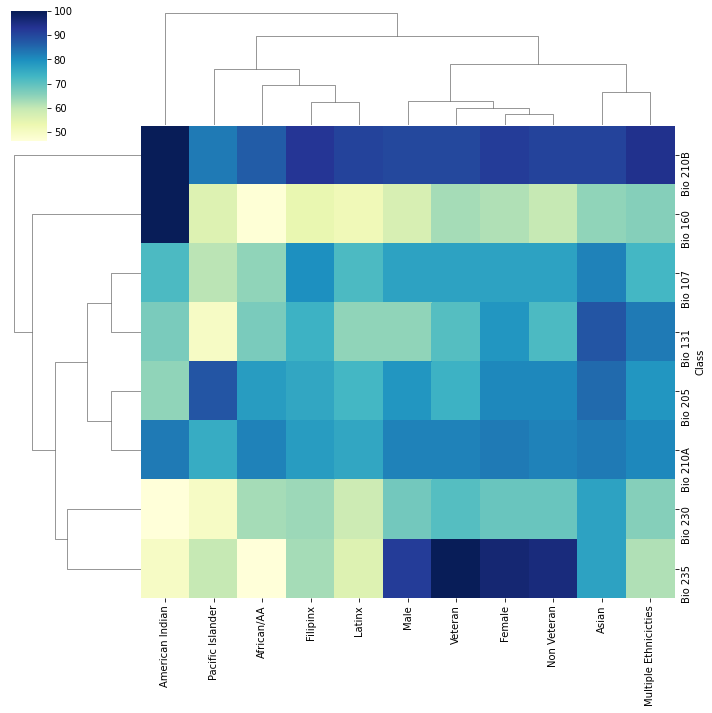

In [27]:
#Generate clustermap of data using complete method
sns.clustermap(dfegd, robust = True,  cmap = "YlGnBu", method = 'complete', figsize=(10, 10))

In [28]:
#Notice in the following commend I also set the first column 0 to be the index column. This will be helpful when trying to make heat maps later... Be sure to specify the actual location of the file - place "r" before the path string to address special character, such as '\'.

dfveg = pd.read_excel (r'/Users/jonathanokerblom/Dropbox/My Mac (Jonathan’s MacBook Air)/Documents/Bio133/vetethgendersuccess.xlsx', index_col=0) 
dfveg.describe()

,Male,Female,American Indian,Asian,African/AA,Filipinx,Latinx,Multiple Ethnicicties,Pacific Islander,Veteran,Non Veteran
count,17.000000,17.000000,10.000000,17.000000,16.000000,14.000000,17.000000,15.000000,10.000000,17.000000,17.000000
mean,74.235294,80.588235,77.000000,81.647059,66.750000,72.357143,69.941176,75.533333,60.600000,78.764706,78.058824
std,12.507645,11.974237,23.772066,10.993982,19.136353,15.138373,13.178916,14.739968,16.932546,15.734236,12.244747
min,46.000000,51.000000,33.000000,53.000000,29.000000,32.000000,48.000000,41.000000,33.000000,50.000000,47.000000
25%,67.000000,77.000000,65.500000,77.000000,59.000000,66.500000,59.000000,66.500000,50.000000,67.000000,75.000000
50%,76.000000,81.000000,77.500000,82.000000,67.000000,77.000000,72.000000,79.000000,58.000000,77.000000,77.000000
75%,82.000000,91.000000,100.000000,88.000000,79.000000,80.000000,76.000000,83.000000,71.500000,90.000000,83.000000
max,95.000000,97.000000,100.000000,100.000000,100.000000,93.000000,97.000000,100.000000,88.000000,100.000000,96.000000


In [29]:
dfveg0 = dfveg.fillna(0)

Text(0.5, 1.3, 'Hierarchical Clustering of Average Success Rate by Ethnicity, Gender, and Veteran Status')

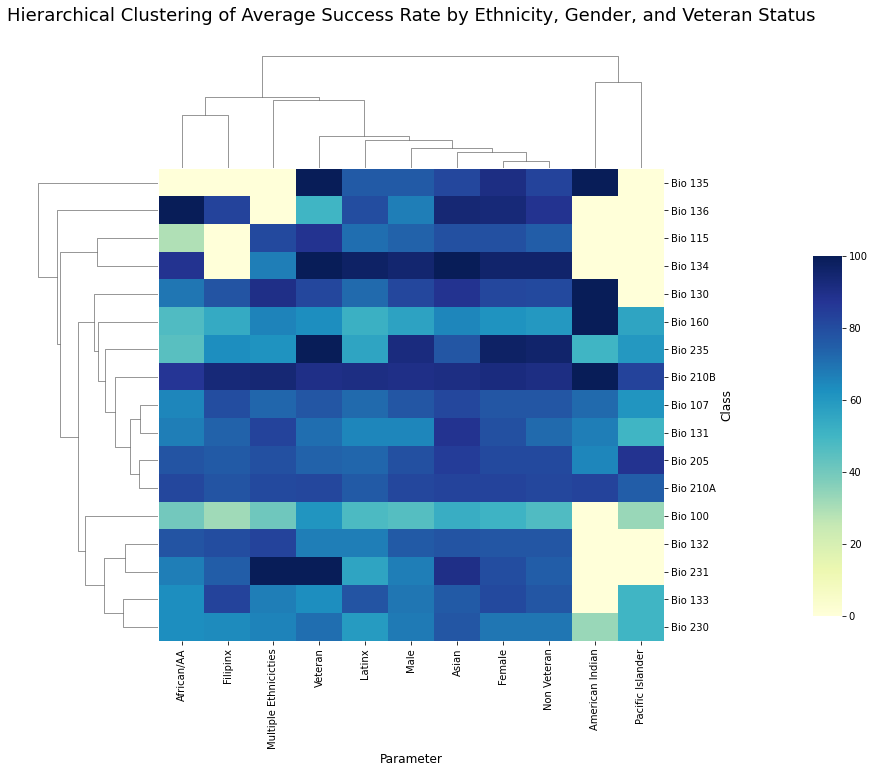

In [30]:
#Generate clustermap of data using complete method
g = sns.clustermap(dfveg0, robust = True,  cmap = "YlGnBu", figsize=(10, 10), cbar_pos=(1.1, .2, .04, .5))
ax = g.ax_heatmap
ax.set_xlabel("Parameter", fontsize = 12)
ax.set_ylabel("Class", fontsize = 12)
ax.set_title('Hierarchical Clustering of Average Success Rate by Ethnicity, Gender, and Veteran Status', y=1.3, fontsize = 18)

In [31]:
#To remove missing values from dataset
dfvegd = dfveg.dropna()
dfvegd

,Male,Female,American Indian,Asian,African/AA,Filipinx,Latinx,Multiple Ethnicicties,Pacific Islander,Veteran,Non Veteran
Class,,,,,,,,,,,
Bio 107,77,77,72.0,82,65.0,80.0,72,73.0,61.0,77,77
Bio 131,65,79,67.0,88,67.0,74.0,65,83.0,50.0,71,72
Bio 160,57,62,100.0,65,47.0,54.0,52,66.0,56.0,63,60
Bio 205,79,81,65.0,85,78.0,76.0,73,79.0,88.0,74,81
Bio 210A,82,83,83.0,83,82.0,78.0,76,81.0,75.0,82,82
Bio 210B,90,92,100.0,91,87.0,93.0,91,94.0,83.0,90,91
Bio 230,68,69,33.0,77,63.0,64.0,59,66.0,50.0,71,69
Bio 235,92,97,50.0,77,45.0,63.0,56,62.0,60.0,100,96


Text(0.5, 1.3, 'Hierarchical Clustering of Average Success Rate by Ethnicity, Gender, and Veteran Status')

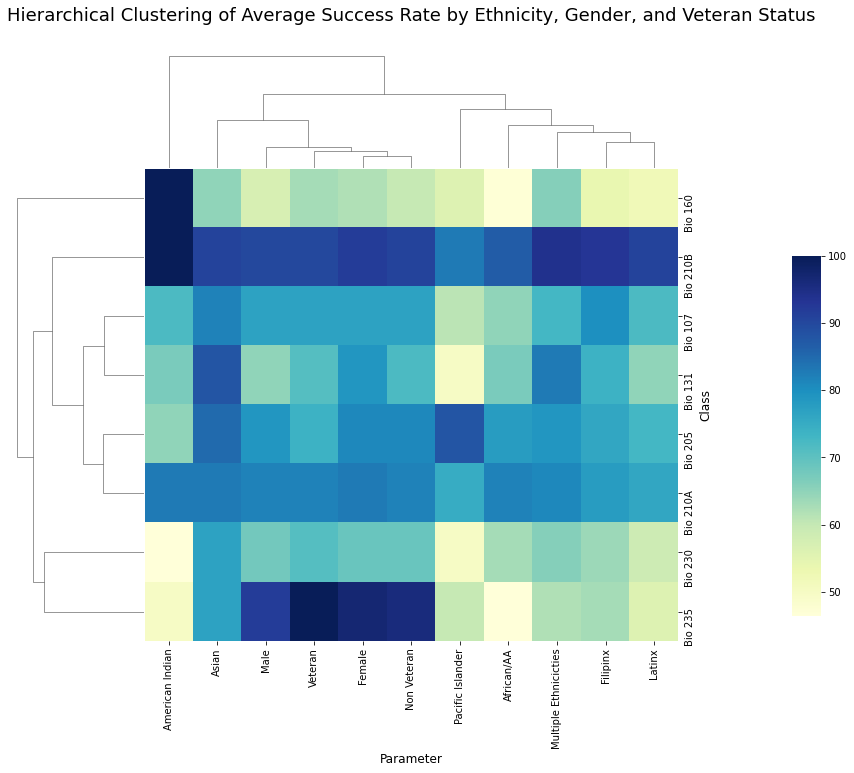

In [32]:
#Generate clustermap of data using complete method
g = sns.clustermap(dfvegd, robust = True,  cmap = "YlGnBu", figsize=(10, 10), cbar_pos=(1.1, .2, .04, .5))
ax = g.ax_heatmap
ax.set_xlabel("Parameter", fontsize = 12)
ax.set_ylabel("Class", fontsize = 12)
ax.set_title('Hierarchical Clustering of Average Success Rate by Ethnicity, Gender, and Veteran Status', y=1.3, fontsize = 18)

In [33]:
dfdd = dfvegd.drop(['Bio 235'])

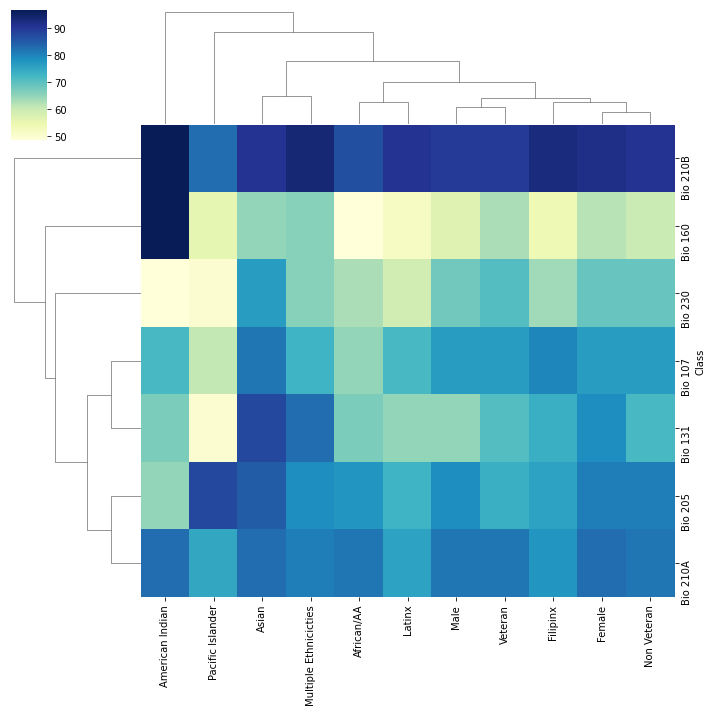

In [34]:
#Generate clustermap of data using complete method
sns.clustermap(dfdd, robust = True,  cmap = "YlGnBu", method = 'complete', figsize=(10, 10))

In [35]:
dfddd = dfvegd.drop(['Bio 160'])

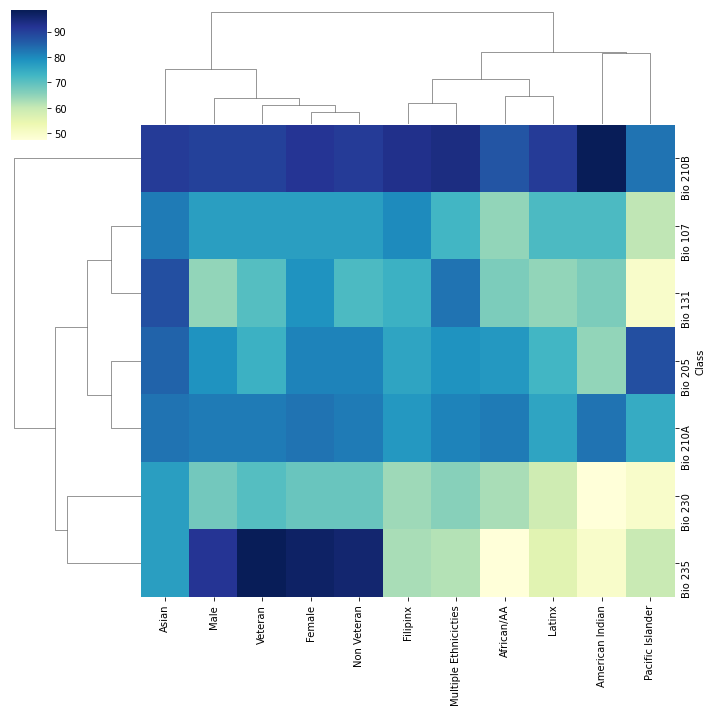

In [36]:
#Generate clustermap of data using complete method
sns.clustermap(dfddd, robust = True,  cmap = "YlGnBu", method = 'complete', figsize=(10, 10))

In [37]:
#Notice in the following commend I also set the first column 0 to be the index column. This will be helpful when trying to make heat maps later... Be sure to specify the actual location of the file - place "r" before the path string to address special character, such as '\'.

dfb = pd.read_excel (r'/Users/jonathanokerblom/Dropbox/My Mac (Jonathan’s MacBook Air)/Documents/Bio133/biotech.xlsx', index_col=0) 
dfb

,Male,Female,American Indian,Asian,African/AA,Filipinx,Latinx,Multiple Ethnicicties,Pacific Islander,Veteran,Non Veteran
Bio 131,65,79,67.0,88,67,74.0,65,83,50.0,71,72
Bio 132,76,77,NaN,78,78,80.0,67,83,NaN,67,77
Bio 133,69,81,NaN,76,63,83.0,78,67,50.0,63,77
Bio 134,95,96,NaN,100,88,NaN,97,67,NaN,100,96


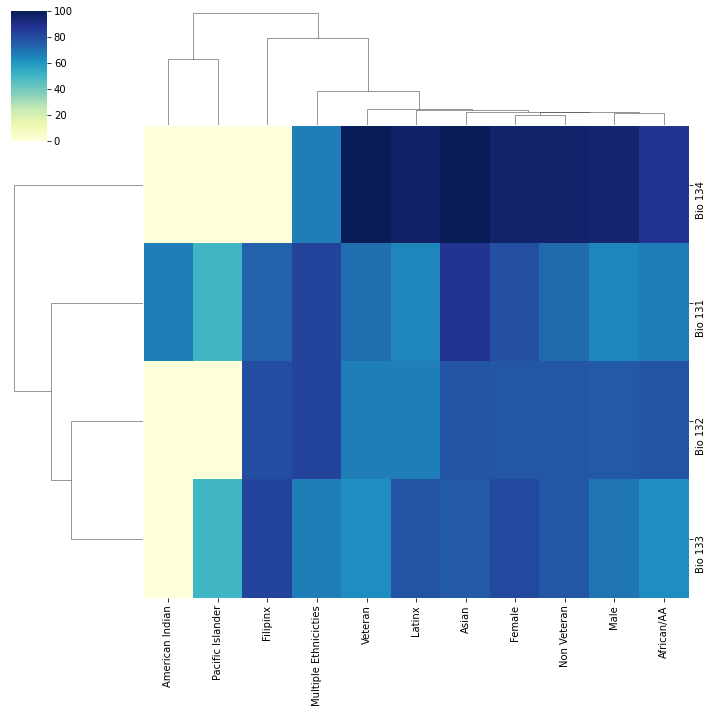

In [38]:
dfbb = dfb.fillna(0)

#Generate clustermap of data using complete method
sns.clustermap(dfbb, robust = True,  cmap = "YlGnBu", method = 'single', figsize=(10, 10))

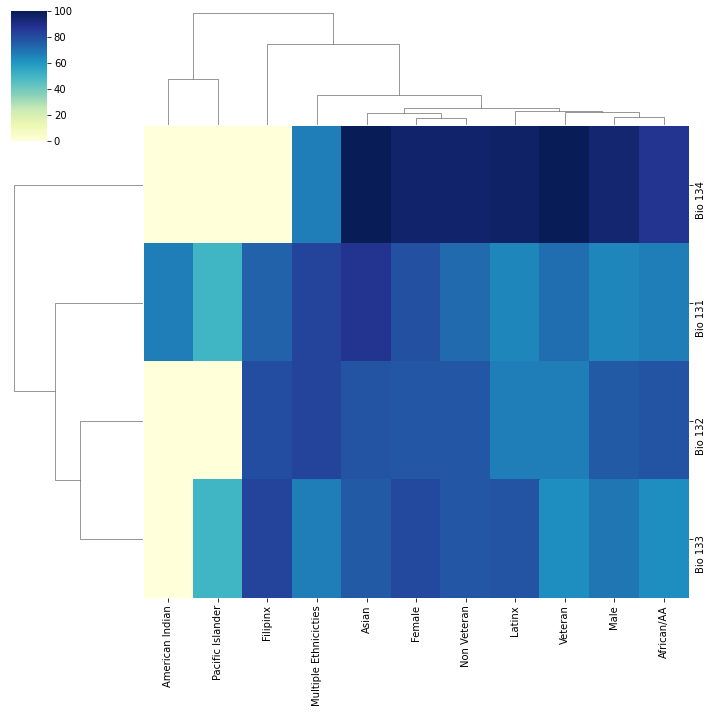

In [39]:
dfbb = dfb.fillna(0)

#Generate clustermap of data using complete method
sns.clustermap(dfbb, robust = True,  cmap = "YlGnBu", method = 'average', figsize=(10, 10))

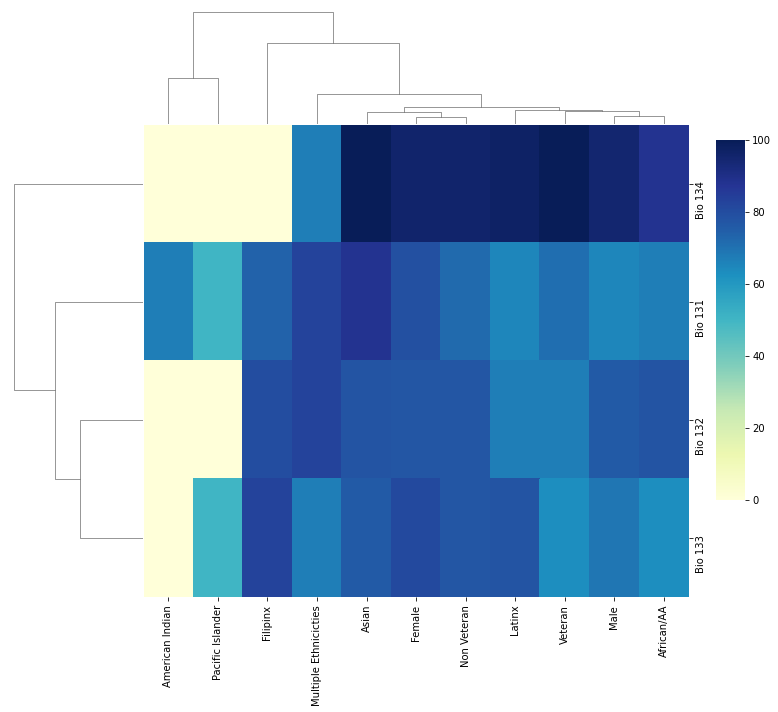

In [40]:
dfbb = dfb.fillna(0)

#Generate clustermap of data using complete method
sns.clustermap(dfbb, robust = True,  cmap = "YlGnBu", figsize=(10, 10), cbar_pos=(1, .3, .04, .5))

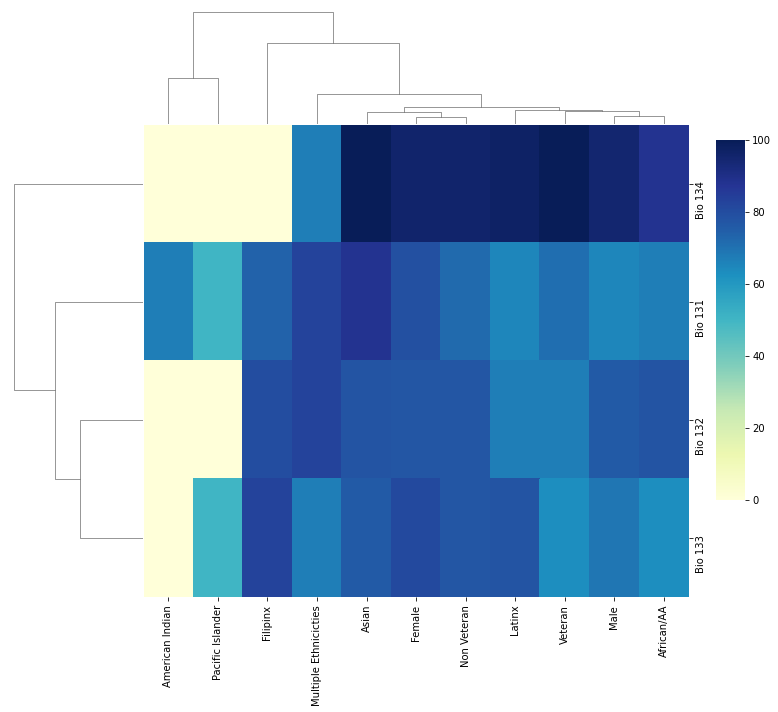

In [41]:
g = sns.clustermap(dfbb, robust = True,  cmap = "YlGnBu", figsize=(10, 10), cbar_pos=(1, .3, .04, .5))

Text(0.5, 1.3, 'Hierarchical Clustering of Average Success Rate by Ethnicity, Gender, and Veteran Status')

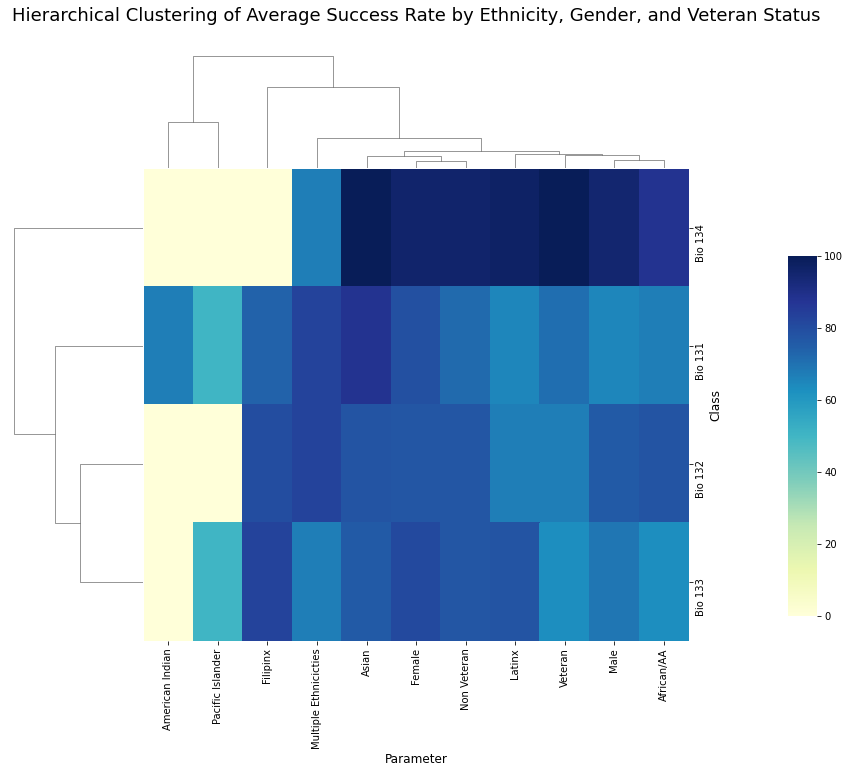

In [42]:
g = sns.clustermap(dfbb, robust = True,  cmap = "YlGnBu", figsize=(10, 10), cbar_pos=(1.1, .2, .04, .5))
ax = g.ax_heatmap
ax.set_xlabel("Parameter", fontsize = 12)
ax.set_ylabel("Class", fontsize = 12)
ax.set_title('Hierarchical Clustering of Average Success Rate by Ethnicity, Gender, and Veteran Status', y=1.3, fontsize = 18)